In [373]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [410]:
#Initialize model parameters
u1 = 5
u2 = 0
pi1 = 0.3
v = 2
sample_size = 500

#Initialize the guesses the EM algorithm will start with
#I just picked these numbers because they seemed far enough away, but not too far
u1_old = 10
u2_old = -5
v1_old = 5
v2_old = 5
pi1_old = 0.5

#Normal transform
def Normal(r, u, v):
    norm = 1/np.sqrt(2*np.pi*v)
    exp_term = np.exp(-0.5 * ((r-u)**2) / v)
    return norm*exp_term

#This is a function used to calculate the gamma values 
#the probability that each data point comes from each distribution
def calculate_gammas(w, pi1, u1, u2, v1, v2):
    gamma1_old = pi1*Normal(w, u1, v1) / (pi1*Normal(w, u1, v1) + (1-pi1)*Normal(w, u2, v2))
    gamma2_old = (1 - pi1)*Normal(w, u2, v2) / (pi1*Normal(w, u1, v1) + (1-pi1)*Normal(w, u2, v2))
    
    reformatted = np.zeros((len(w), 2))
    reformatted[:, 0] = gamma1_old
    reformatted[:, 1] = gamma2_old
    
    #return array in format of [[gamma_1_old_w1, gamma_2_old_w1], [gamma_1_old_w2, gamma_2_old_w2], ...]
    #each column will be a list of gamma_1_old and gamma_2_old values
    return reformatted

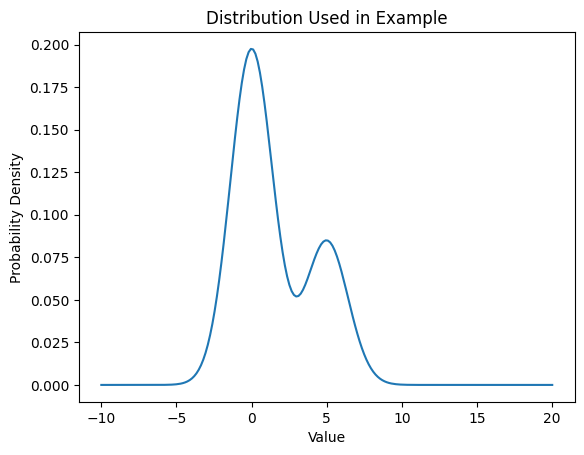

In [411]:
#A quick plot to show the distribution used
x = np.linspace(-10, 20, 200)
y = (pi1*Normal(x, u1, v)) + ((1-pi1)*Normal(x, u2, v))
plot = plt.plot(x, y)
title = plt.title("Distribution Used in Example")
xlabel = plt.xlabel("Value")
ylabel = plt.ylabel("Probability Density")

In [412]:
#Create the data. Note that I just sample a number of times from each distribution with the right proportions. 
#This is not exactly equivalent to categorically sampling which normal distribution is used first, then sampling 
#from that distribution; but the task was to sample from a sum of gaussians.
data_g1 = np.random.normal(u1, np.sqrt(v), int(sample_size * pi1))
data_g2 = np.random.normal(u2, np.sqrt(v), int(sample_size * (1-pi1)))
data_g = np.concatenate((data_g1, data_g2))
np.random.shuffle(data_g)

In [413]:
gamma_vals = calculate_gammas(data_g, pi1_old, u1_old, u2_old, v1_old, v2_old)

#calculate pi1_new
gamma_1_2_sum = np.sum(gamma_vals[:, 0] + gamma_vals[:, 1]) #denominator of pi1_new calculation
pi1_new = np.sum(gamma_vals[:, 0]) / gamma_1_2_sum

#calculate predicted means
u1_new = np.sum(np.multiply(gamma_vals[:, 0], data_g)) / np.sum(gamma_vals[:, 0])
u2_new = np.sum(np.multiply(gamma_vals[:, 1], data_g)) / np.sum(gamma_vals[:, 1])

#calculate predicted variances
v1_new = np.sum(np.multiply(gamma_vals[:, 0], data_g - u1_new) ** 2) / np.sum(gamma_vals[:, 0])
v2_new = np.sum(np.multiply(gamma_vals[:, 1], data_g - u2_new) ** 2) / np.sum(gamma_vals[:, 1])

In [414]:
u1_new

4.816835589699598

In [415]:
u2_new

0.011143046327313824

In [416]:
v1_new

1.9617713678816961

In [417]:
v2_new

1.4703955637051924

In [418]:
pi1_new

0.31154606262996426

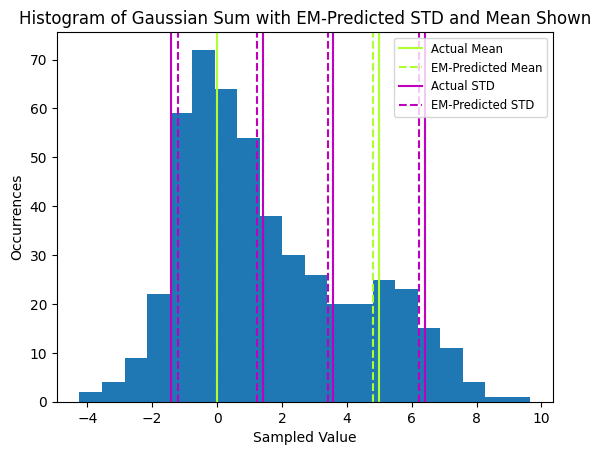

In [419]:
#plot histogram of data
histogram = plt.hist(data_g, bins=20)

#plot vertical lines for means and standard deviations
plot_u1 = plt.axvline(x = u1, color = "greenyellow")
plot_u2 = plt.axvline(x = u2, color = "greenyellow", label = "Actual Mean")

plot_u1_new = plt.axvline(x = u1_new, color = "greenyellow", linestyle = "dashed")
plot_u2_new = plt.axvline(x = u2_new, color = "greenyellow", linestyle = "dashed", label = "EM-Predicted Mean")

plot_std1 = plt.axvline(x = (u1 - np.sqrt(v)), color = "m")
plot_std1 = plt.axvline(x = (u1 + np.sqrt(v)), color = "m")

plot_std2 = plt.axvline(x = (u2 - np.sqrt(v)), color = "m")
plot_std2 = plt.axvline(x = (u2 + np.sqrt(v)), color = "m", label = "Actual STD")

plot_std1_new = plt.axvline(x = (u1_new - np.sqrt(v1_new)), color = "m", linestyle = "dashed")
plot_std1_new = plt.axvline(x = (u1_new + np.sqrt(v1_new)), color = "m", linestyle = "dashed")

plot_std2_new = plt.axvline(x = (u2_new - np.sqrt(v2_new)), color = "m", linestyle = "dashed", 
                              label = "EM-Predicted STD")
plot_std2_new = plt.axvline(x = (u2_new + np.sqrt(v2_new)), color = "m", linestyle = "dashed")

#show title, legend, and axis labels
title = plt.title("Histogram of Gaussian Sum with EM-Predicted STD and Mean Shown")
xlabel = plt.xlabel("Sampled Value")
ylabel = plt.ylabel("Occurrences")
labels = plt.legend(fontsize = "small")